<a href="https://colab.research.google.com/github/youjinchang/SportAnalysis/blob/main/03_1_SBHAR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  스마트폰 기반 HAR Dataset (SBHAR)

* Dataset: http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions
* Smartphone-Based Recognition of Human Activities and Postural Transitions Data Set 입니다.

## Setup

### Loading Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import socket
hostname = socket.gethostname()
print(hostname)

63ef4acc3c0f


In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import pandas as pd
import seaborn as sns

### Google drive 준비하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

## 파일 열기

### Data 폴더 열람해보기

In [ ]:
!ls data

dataset_01_weightlifting.csv	    dataset_04_SBHAR
dataset_02_noc_regions.csv	    __pycache__
dataset_02_summer_olympic_data.csv  Week04_Dataframe_review_ipynb
dataset_03_diabetes.csv


In [ ]:
data_loc = './data/dataset_04_SBHAR/RawData'
! ls $data_loc

acc_exp01_user01.txt  acc_exp42_user21.txt   gyro_exp22_user11.txt
acc_exp02_user01.txt  acc_exp43_user21.txt   gyro_exp23_user11.txt
acc_exp03_user02.txt  acc_exp44_user22.txt   gyro_exp24_user12.txt
acc_exp04_user02.txt  acc_exp45_user22.txt   gyro_exp25_user12.txt
acc_exp05_user03.txt  acc_exp46_user23.txt   gyro_exp26_user13.txt
acc_exp06_user03.txt  acc_exp47_user23.txt   gyro_exp27_user13.txt
acc_exp07_user04.txt  acc_exp48_user24.txt   gyro_exp28_user14.txt
acc_exp08_user04.txt  acc_exp49_user24.txt   gyro_exp29_user14.txt
acc_exp09_user05.txt  acc_exp50_user25.txt   gyro_exp30_user15.txt
acc_exp10_user05.txt  acc_exp51_user25.txt   gyro_exp31_user15.txt
acc_exp11_user06.txt  acc_exp52_user26.txt   gyro_exp32_user16.txt
acc_exp12_user06.txt  acc_exp53_user26.txt   gyro_exp33_user16.txt
acc_exp13_user07.txt  acc_exp54_user27.txt   gyro_exp34_user17.txt
acc_exp14_user07.txt  acc_exp55_user27.txt   gyro_exp35_user17.txt
acc_exp15_user08.txt  acc_exp56_user28.txt   gyro_exp36_user18

맨 마지막에 labels.txt가 있음을 확인

### Label 로드하고 처리하기

In [ ]:
labels = np.loadtxt( os.path.join(data_loc, 'labels.txt'))

In [ ]:
len(labels)

1214

In [ ]:
labels

array([[1.0000e+00, 1.0000e+00, 5.0000e+00, 2.5000e+02, 1.2320e+03],
       [1.0000e+00, 1.0000e+00, 7.0000e+00, 1.2330e+03, 1.3920e+03],
       [1.0000e+00, 1.0000e+00, 4.0000e+00, 1.3930e+03, 2.1940e+03],
       ...,
       [6.1000e+01, 3.0000e+01, 2.0000e+00, 1.5588e+04, 1.6319e+04],
       [6.1000e+01, 3.0000e+01, 3.0000e+00, 1.6546e+04, 1.7250e+04],
       [6.1000e+01, 3.0000e+01, 2.0000e+00, 1.7394e+04, 1.8097e+04]])

* integer (정수) 형태로 변환

In [ ]:
labels = labels.astype(int)

In [ ]:
labels

array([[    1,     1,     5,   250,  1232],
       [    1,     1,     7,  1233,  1392],
       [    1,     1,     4,  1393,  2194],
       ...,
       [   61,    30,     2, 15588, 16319],
       [   61,    30,     3, 16546, 17250],
       [   61,    30,     2, 17394, 18097]])

In [ ]:
labels.shape

(1214, 5)

In [ ]:
len(labels)

1214

## Dataframe을 이용한 데이터 탐색

### Dataframe 형태로 변환하기

In [ ]:
df = pd.DataFrame(labels, columns=['experiment number ID', 'user number ID', 'activity number ID',
                                   'Label start point', 'Label end point'])

In [ ]:
df.head(15)

,experiment number ID,user number ID,activity number ID,Label start point,Label end point
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194
3,1,1,8,2195,2359
4,1,1,5,2360,3374
5,1,1,11,3375,3662
6,1,1,6,3663,4538
7,1,1,10,4539,4735
8,1,1,4,4736,5667
9,1,1,9,5668,5859


In [ ]:
# Activity labels
motionname=['WALKING',
'WALKING_UPSTAIRS',
'WALKING_DOWNSTAIRS',
'SITTING',
'STANDING',
'LAYING',
'STAND_TO_SIT',
'SIT_TO_STAND',
'SIT_TO_LIE',
'LIE_TO_SIT',
'STAND_TO_LIE',
'LIE_TO_STAND']

In [ ]:
n_classes = len(motionname)

### 각 column 별 고유값 확인해보기

In [ ]:
activity = df['activity number ID'].unique()

In [ ]:
np.sort(activity)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
np.unique(df["experiment number ID"])           # == np.unique(labels[:,0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [ ]:
np.unique(df["user number ID"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

아래처럼 n_users가 데이터에 의해 결정되도록 설정

In [ ]:
n_users = len(np.unique(df["user number ID"]))

In [ ]:
np.unique(df["activity number ID"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

지금까지 알게 된 것
* experiment number ID 는 실험단위로 1~61까지 총 61번의 실험 데이터를 포함함.
* user number ID 는 실험에 참여한 사람을 말하며 30명임.
* activity number ID 는 수행한 동작으로 총 12가지 동작임.
* 한번의 실험을 하는 동안 user 은 달라지지 않으며 다양한 동작을 연속적으로 수행함.
* 각 동작의 시작/종료시점이 포함되어 있음.

### Column 별 분석

label.txt 분석하기
* Column 1: experiment number ID
* Column 2: user number ID,
* Column 3: activity number ID
* Column 4: Label start point (in number of signal log samples)
* Column 5: Label end point (in number of signal log samples)

Column 4/5 를 분석하면 동작별 수행시간 (지속 시간) 을 알 수 있음

In [ ]:
df["interval"] = (df["Label end point"] - df["Label start point"]) * 20/1000  # sec. #20 ms <-- recorded at 50Hz

In [ ]:
df.head(10)

,experiment number ID,user number ID,activity number ID,Label start point,Label end point,interval
0,1,1,5,250,1232,19.64
1,1,1,7,1233,1392,3.18
2,1,1,4,1393,2194,16.02
3,1,1,8,2195,2359,3.28
4,1,1,5,2360,3374,20.28
5,1,1,11,3375,3662,5.74
6,1,1,6,3663,4538,17.50
7,1,1,10,4539,4735,3.92
8,1,1,4,4736,5667,18.62
9,1,1,9,5668,5859,3.82


### activity number ID 별로 interval 합 구하기

In [ ]:
[0] * n_classes

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
12*1214

14568

In [ ]:
t_activity = [0] * n_classes

for j in range(0,n_classes): #12
    for i in range(len(df)): #1214
         if df["activity number ID"][i] == j+1:
                t_activity[j] = t_activity[j]+df["interval"][i]

In [ ]:
print(t_activity)

[2439.2799999999997, 2330.4800000000014, 2155.4999999999995, 2531.1399999999994, 2759.7000000000007, 2734.9, 205.1200000000001, 159.34000000000003, 247.35999999999999, 221.80000000000004, 287.20000000000005, 216.1799999999999]


In [ ]:
print(np.round(t_activity, 2)) #소수 2자리까지 반올림하여 출력 (Round an array to the given number of decimals.)

[2439.28 2330.48 2155.5  2531.14 2759.7  2734.9   205.12  159.34  247.36
  221.8   287.2   216.18]


* HW 01:Do-it-your-self I: groupby 를 이용하여 구해보세요 아래처럼 출력해보세요
```
activity number ID
1     2439.28
2     2330.48
3     2155.50
...
10     221.80
11     287.20
12     216.18
Name: interval, dtype: float64
```

### user number ID 별로 interval 합 구하기

In [ ]:
#user number ID 별로 interval 합 구하기
#t_users = [0] *30  #hard-coded 로서 좋은 방법이 아님
t_users = [0] * n_users

for j in range(0,n_users):
    for i in range(len(df)):
        if df["user number ID"][i] == j+1:
            t_users[j] = t_users[j]+df["interval"][i]

print(np.round(t_users, 2))

[557.2  492.48 540.12 507.02 492.16 512.82 480.96 456.68 475.82 467.58
 504.98 514.44 522.42 518.04 523.58 559.48 589.82 591.7  561.52 568.72
 631.28 509.42 574.48 601.9  629.76 601.14 584.48 574.16 542.84 601.  ]


* HW 02: Do-it-yourself II: groupby 를 이용하여 아래처럼 출력해보세요
```
user number ID
1     557.20
2     492.48
3     540.12
...
27    584.48
28    574.16
29    542.84
30    601.00
Name: interval, dtype: float64
```


### experiment number ID 별로 interval 합 구하기

In [ ]:
#experiment number ID 별로 interval 합 구하기
t_experiment_id = [0] *61 #변수로 바꾸어보세요

for j in range(0,61):
    for i in range(len(df)):
        if df["experiment number ID"][i] == j+1:
            t_experiment_id[j] = t_experiment_id[j]+df["interval"][i]

print(t_experiment_id)

[278.68, 278.52, 259.56, 232.91999999999996, 276.24, 263.88, 263.62000000000006, 243.39999999999998, 257.28000000000003, 234.87999999999997, 261.55999999999995, 251.26000000000005, 249.48000000000002, 231.48000000000002, 222.58, 234.09999999999997, 238.76000000000002, 237.06000000000006, 232.8, 131.58, 103.19999999999999, 246.97999999999996, 258.0, 256.40000000000003, 258.04, 270.84, 251.57999999999998, 262.32, 255.71999999999997, 258.03999999999996, 265.53999999999996, 272.26, 287.21999999999997, 302.38, 287.44, 307.94000000000005, 283.76, 290.16, 271.36, 287.52, 281.2, 325.6400000000001, 305.64000000000004, 257.84000000000003, 251.58000000000004, 286.16, 288.32, 303.86, 298.04, 317.04, 312.71999999999997, 304.68000000000006, 296.46, 286.05999999999995, 298.41999999999996, 312.02, 262.14, 278.0, 264.84, 310.85999999999996, 290.13999999999993]


* HW 03: Do-it-yourself III : groupby 를 이용하여 아래처럼 출력해보세요
```
experiment number ID
1     278.68
2     278.52
3     259.56
       ...  
59    264.84
60    310.86
61    290.14
Name: interval, Length: 61, dtype: float64
```

* 동작별 수행시간 알아보기

우선 아래처럼 일반적인 list를 numpy array 로 변경합니다.

In [ ]:
t_activity = np.array(t_activity)
t_users = np.array(t_users)
t_experiment_id = np.array(t_experiment_id)

NameError: ignored

초(sec)을 분(minute)으로 환산

In [ ]:
t_activity = t_activity/60
t_users = t_users/60
t_experiment_id = t_experiment_id/60

In [ ]:
fig, ((ax1,ax2,ax3)) = plt.subplots(3,1, figsize=(15,8))
plt.tight_layout(pad=2)

t = [ x+1 for x in range(61)]
sns.barplot(t, t_experiment_id, ax= ax1)

t = [ x+1 for x in range(30)]
sns.barplot(t, t_users, ax= ax2)

t = [ x+1 for x in range(n_classes)]
sns.barplot(t, t_activity, ax= ax3)

ax1.set(ylabel='Time (min)',title="Experiment number ID")
ax2.set(ylabel='Time (min)',title="User number ID")
ax3.set(ylabel='Time (min)',title="Activity number ID")

알게된 것
* end point - strat point를 해서 interval을 구해보면 동작을 수행한 시간이 나오는데, 단위는 ms이다.
* 첫번째 그래프를 보면 대부분의 실험은 4분 정도 수행됐다.
* 두번째 그래프를 보면 대부분의 참가자는 10분 정도의 데이터를 모았다.
* 세번째 그래프를 보면 1 ~ 6번 클래스는 30분 이상 모였으며, 7 ~ 12번 클래스는 대략 5분 정도 모인것을 알 수 있다.

### 시간 분포보기

* 각 실험마다 한 동작의 수행 시간

In [ ]:
df[['interval', 'experiment number ID','activity number ID']]

,interval,experiment number ID,activity number ID
0,19.64,1,5
1,3.18,1,7
2,16.02,1,4
3,3.28,1,8
4,20.28,1,5
...,...,...,...
1209,14.64,61,2
1210,13.52,61,3
1211,14.62,61,2
1212,14.08,61,3


#### Categorical plot (catplot) 그려보기

* 각 실험마다 수행한 동작에 대한 시간

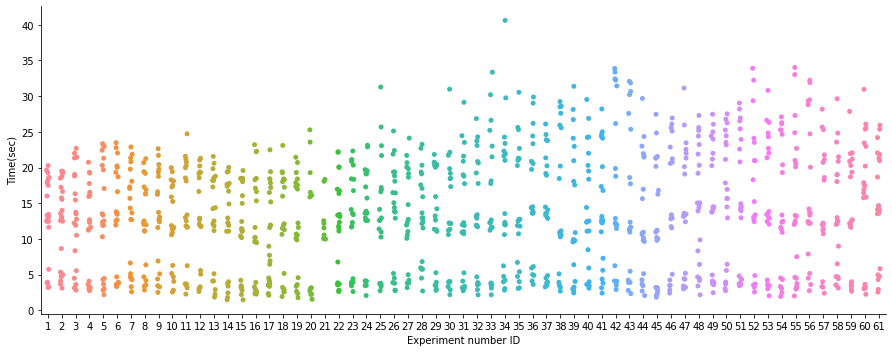

In [ ]:
e_graph = sns.catplot(x = "experiment number ID", y = "interval", data = df, aspect=2.5)#
e_graph.set_axis_labels("Experiment number ID", "Time(sec)")

* 각 사람마다 몇 번의 동작을 오래 수행했는지에 대한 시간

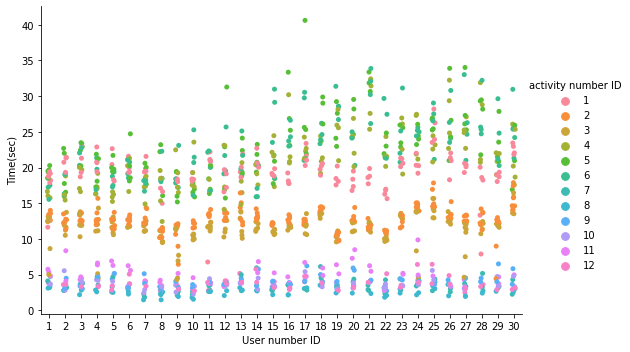

In [ ]:
u_graph = sns.catplot(x = "user number ID", y = "interval", hue = "activity number ID", data = df, aspect=1.5)
u_graph.set_axis_labels("User number ID", "Time(sec)")

* 동작별 지속 시간

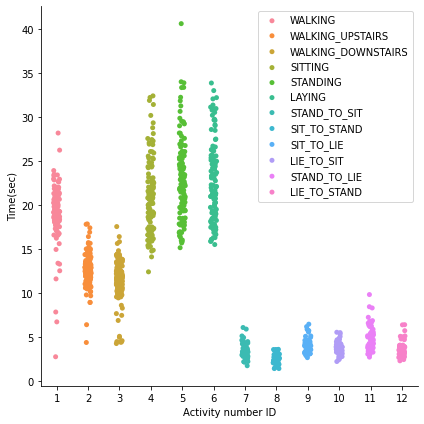

In [ ]:
a_graph = sns.catplot(x = "activity number ID", y = "interval", data = df, height=6)
a_graph.set_axis_labels("Activity number ID", "Time(sec)")
plt.legend(motionname)